In [1]:
import cv2 as cv
import matplotlib.pylab as plt
import numpy as np
import math

In [2]:
def Perform_Convolution(image,mask):
    flipped_mask=Flip_Mask(mask)
    padded_img=Apply_Padding(image,len(flipped_mask))
    convoluted_img=Convolution(padded_img,image,flipped_mask)
    return convoluted_img

def Flip_Mask(mask):
    size=len(mask)
    flipped_mask=np.zeros((size,size),dtype=float)
    row=size
    for i in range(size):
        row=row-1
        col=size
        for j in range(size):
            col=col-1
            flipped_mask[row][col]=mask[i][j]
    return flipped_mask
def Apply_Padding(img,len_mask):
    #img_rows,img_cols=img.shape
    img_rows,img_cols=img.shape
    padded_rows=len_mask-1
    padded_cols=len_mask-1
    padded_img=np.zeros((img_rows+padded_rows,img_cols+padded_cols),np.uint64)
    for i in range(img_rows):
        for j in range(img_cols):
            padded_img[i+int(padded_rows/2)][j+int(padded_cols/2)]=img[i][j]
    return padded_img
def Convolution(padded_img,img,mask): #Convolution function which will return the result of convolution
    img_rows,img_cols=img.shape
    padded_rows=len(mask)-1
    padded_cols=len(mask)-1
    Convoluted_img=np.zeros((padded_img.shape[0],padded_img.shape[1]))   #define convoluted_ig for storing result having shape equal to padded_img
    for i in range(int(padded_rows/2),img_rows+1):
        for j in range(int(padded_cols/2),img_cols+1):    #i,j tells us the index where we have to apply convolution ie not on padded_rows and cols
            value=0                                       #for storing value
            mask_row=-1                                   #tells us the row of mask that we have to multiply
            for k in range(i-int(padded_rows/2),i+int(padded_rows/2)+1):   #k tells us about the neighbour rows that we have to multiply
                mask_row+=1
                mask_col=-1
                for l in range(j-int(padded_cols/2),j+int(padded_cols/2)+1): # l tells us about the neighbour cols that we have to multiply
                    mask_col+=1
                    value+=padded_img[k][l]*mask[mask_row][mask_col]    #multiply each neighbour including index itself with entries of mask and then adding in value
            Convoluted_img[i][j]=value        #Simply store result after convolution dont for that specific index
    return Convoluted_img
def Gradient(fx,fy):
    a_sq=fx*fx;
    b_sq=fy*fy
    aPlusb=a_sq+b_sq
    gradient_magnitude=np.sqrt(aPlusb)
    return gradient_magnitude
def Direction(fx,fy):
    direction=np.arctan2(fy,fx)
    direction=np.rad2deg(direction)
    direction+=180
    return direction
def find_cross_nbrs(angle,i,j):
    if (angle>=22.5 and angle<67.5)or(angle>=202.5 and angle<247.5):
        return((i-1,j+1),(i+1,j-1))
    elif (angle>=67.5 and angle<112.5)or(angle>=247.5 and angle<292.5):
        return((i-1,j),(i+1,j))
    elif (angle>=112.5 and angle<157.5)or(angle>=292.5 and angle<337.5):
        return((i-1,j-1),(i+1,j+1))
    else:
        return((i,j-1),(i,j+1))
        
def NonMaximaSuppresion(original,gradient,direction):
    suppresed=np.copy(gradient)
    padded_rows=gradient.shape[0]-original.shape[0]
    padded_cols=gradient.shape[1]-original.shape[1]
    for i in range(int(padded_rows/2),original.shape[0]+1):
        for j in range(int(padded_cols/2),original.shape[1]+1):
            ((a,b),(c,d))=find_cross_nbrs(direction[i][j],i,j)
            if((gradient[i][j]<gradient[a][b])or(gradient[i][j]<gradient[c][d])):
                suppresed[i][j]=0
    return suppresed
def Thresholding(img,thigh,tlow):
    thresholded=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]>thigh):
                thresholded[i][j]=255
            elif(img[i][j]<tlow):
                thresholded[i][j]=0
            else:
                thresholded[i][j]=50
    return thresholded
def hysterisis(thresholded_img,original_img):
    hys_thresholded=np.copy(thresholded_img)
    padded_rows=thresholded_img.shape[0]-original_img.shape[0]
    padded_cols=thresholded_img.shape[0]-original_img.shape[0]
    for i in range(int(padded_rows/2),original_img.shape[0]+1):
        for j in range(int(padded_cols/2),original_img.shape[1]+1):
            if(thresholded_img[i][j]==50):
                if(thresholded_img[i-1][j-1]==255 or thresholded_img[i-1][j]==255 or thresholded_img[i-1][j+1]==255 or thresholded_img[i][j-1]==255 or thresholded_img[i][j]==255 or thresholded_img[i][j+1]==255 or thresholded_img[i+1][j-1]==255 or thresholded_img[i+1][j]==255 or thresholded_img[i+1][j+1]==255):
                    hys_thresholded[i][j]=255
    return hys_thresholded 
                    
                    
    

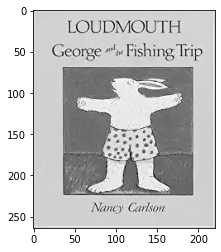

In [3]:
#Step no 1:Read image as gray
img=cv.imread("book.jpg",0)
plt.imshow(img,cmap="gray")

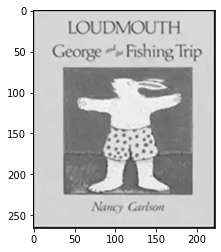

In [4]:
#Apply Guassian Filter
guass_filter=np.array([
    [1/16,2/16,1/16],
    [2/16,4/16,2/16],
    [1/16,2/16,1/16]
])
blurred_img=Perform_Convolution(img,guass_filter)
plt.imshow(blurred_img,cmap="gray")

True

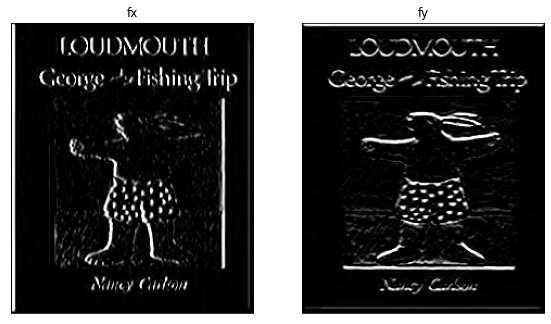

In [5]:
#fx and fy using sobel filter
Horizontal_Sobel_Filter=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
Vertical_Sobel_Filter=np.array([
     [1,2,1],
     [0,0,0],
     [-1,-2,-1]
])
fx=Perform_Convolution(blurred_img,Horizontal_Sobel_Filter)
fy=Perform_Convolution(blurred_img,Vertical_Sobel_Filter)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(fx, cmap='gray')
plt.title('fx')
plt.xticks([])
plt.yticks([])
plt.subplot(142)
plt.imshow(fy, cmap='gray')
plt.title('fy')
plt.xticks([])
plt.yticks([])
cv.imwrite("fx.jpg",fx)
cv.imwrite("fy.jpg",fy)

True

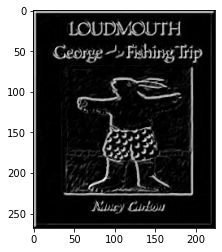

In [6]:
#find gradient
gradient=Gradient(fx,fy)
plt.imshow(gradient,cmap="gray")
cv.imwrite("Gradient.jpg",gradient)

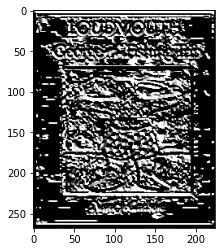

In [7]:
#find gradient direction
direction=Direction(fx,fy)
plt.imshow(direction,cmap="gray")

True

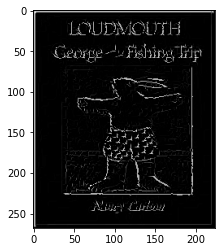

In [8]:
#Non Maxima Suppresion:
Suppresed=NonMaximaSuppresion(img,gradient,direction)
plt.imshow(Suppresed,cmap="gray")
cv.imwrite("NMS.jpg",Suppresed)

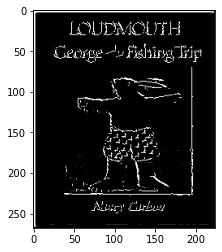

In [9]:
#Thresholding
T_high=120
T_low=80
Thresholded_img=Thresholding(Suppresed,T_high,T_low)
plt.imshow(Thresholded_img,cmap="gray")

True

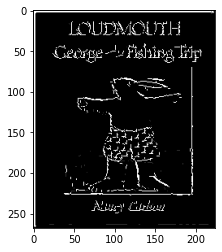

In [10]:
#Hysterisis Thresholding
Final_Result=hysterisis(Thresholded_img,img)
plt.imshow(Final_Result,cmap="gray")
cv.imwrite("HysterisisThresholding.jpg",Final_Result)

In [11]:
def main():
    print("gg")
if __name__=="__main__":
    main()

gg


In [12]:
mask=[
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
mask=Flip_Mask(mask)
print(mask)

[[9. 8. 7.]
 [6. 5. 4.]
 [3. 2. 1.]]
